In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

<h2>Importing the data and transform it into DataFrame</h2>

In [5]:
columns = ['Class'] + [f'Time_{i}' for i in range(1, 97)]

df = pd.read_csv('ECG200_TRAIN.txt', delimiter='\s+', header=None, names=columns)

df.head(5)

,Class,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,...,Time_87,Time_88,Time_89,Time_90,Time_91,Time_92,Time_93,Time_94,Time_95,Time_96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


<h2>Handling missing values</h2>

In [6]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Class      0
Time_1     0
Time_2     0
Time_3     0
Time_4     0
          ..
Time_92    0
Time_93    0
Time_94    0
Time_95    0
Time_96    0
Length: 97, dtype: int64


In [7]:
df.fillna(df.mean(), inplace=True)


<h2>Verifying the features of the data</h2>

In [8]:
df.describe()

,Class,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,...,Time_87,Time_88,Time_89,Time_90,Time_91,Time_92,Time_93,Time_94,Time_95,Time_96
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.380000,0.708438,1.422151,2.039149,2.126455,1.551616,0.762251,0.282647,0.333630,0.372973,...,0.190412,0.174286,0.205107,0.286484,0.412464,0.459377,0.389852,0.282864,0.182829,0.174863
std,0.929646,0.593513,0.927972,1.046880,1.098754,0.954734,0.963111,1.096712,0.877640,0.761753,...,0.403825,0.434002,0.454395,0.589879,0.772104,0.871045,0.832312,0.665548,0.619799,0.413644
min,-1.000000,-0.706305,-1.100715,-1.321589,-1.076313,-1.247922,-1.482391,-1.598712,-1.508060,-1.609777,...,-0.533503,-0.691436,-0.516631,-0.574304,-0.559178,-0.530917,-0.738019,-0.970796,-1.862314,-1.238622
25%,-1.000000,0.318643,0.779810,1.525548,1.511639,0.966292,0.022470,-0.603378,-0.464767,-0.075355,...,-0.131730,-0.140244,-0.121657,-0.144015,-0.070247,-0.098634,-0.107719,-0.119784,-0.124178,-0.043105
50%,1.000000,0.581008,1.232191,2.152552,2.234408,1.746861,0.574297,0.120230,0.366122,0.457255,...,0.086719,0.089474,0.107957,0.129133,0.170798,0.205220,0.101618,0.136106,0.124148,0.152284
75%,1.000000,0.994760,2.093703,2.707411,2.865394,2.163355,1.502335,1.226563,1.008876,0.990675,...,0.439861,0.468588,0.480635,0.613990,0.588429,0.630966,0.560136,0.594807,0.541680,0.429055
max,1.000000,2.689017,3.535038,3.850263,4.199145,3.720899,3.026452,2.454195,2.220327,2.122435,...,1.376751,1.497244,1.436900,2.190151,3.047309,3.269882,3.332053,2.653741,1.930880,1.372607


<h2>Spltting the df</h2>

In [34]:
X = df.drop('Class', axis=1)
y = df['Class']

<h2>Normalizing the data</h2>

In [35]:
global_max = X.values.max()
global_min = X.values.min()

X_normalized = (X - global_min) / (global_max - global_min)

In [37]:
df_normalized = pd.concat([y, X_normalized], axis=1)

<h2>Plotting some samples</h2>

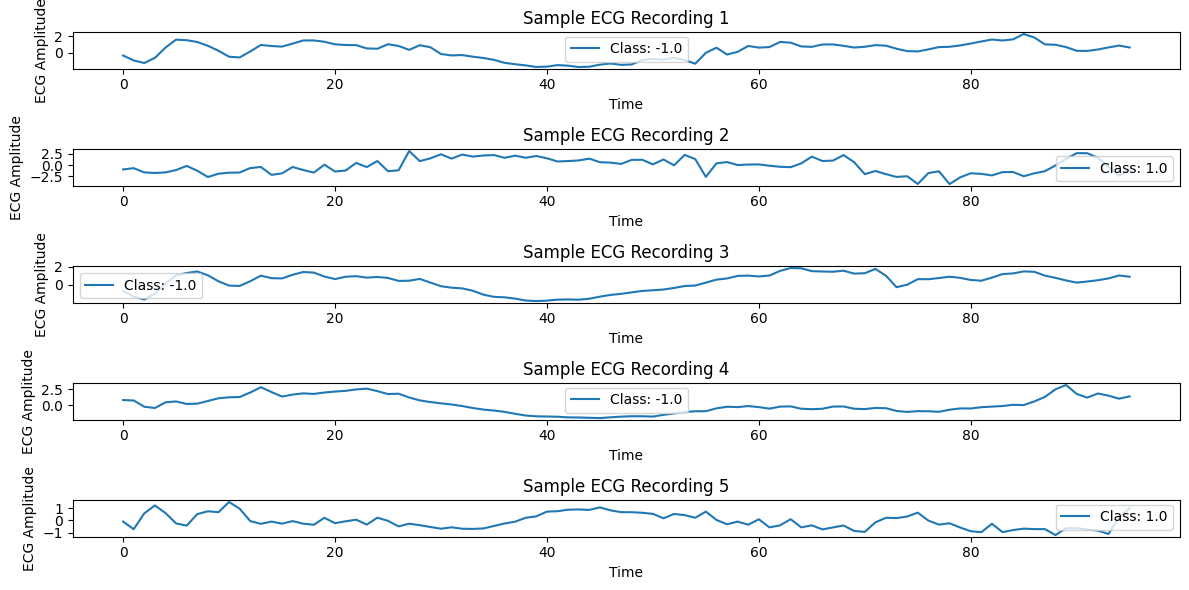

In [23]:

num_samples_to_plot = 5

plt.figure(figsize=(12, 6))

for i in range(num_samples_to_plot):
    plt.subplot(num_samples_to_plot, 1, i + 1)
    plt.plot(X[i], label=f"Class: {y[i]}")
    plt.xlabel('Time')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Sample ECG Recording {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()


<h2>Splitting the data</h2>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


<h1> MODELS </h1>

<h1>Random Forest</h1>

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.67      0.67      0.67         6
         1.0       0.86      0.86      0.86        14

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20



<H1>KNN</H1>

In [40]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))

knn_y_pred_train = knn_model.predict(X_train)
print("KNN Classification Report Train:\n", classification_report(y_train, knn_y_pred_train))

KNN Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.67      0.80         6
         1.0       0.88      1.00      0.93        14

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20

KNN Classification Report Train:
               precision    recall  f1-score   support

        -1.0       0.86      0.76      0.81        25
         1.0       0.90      0.95      0.92        55

    accuracy                           0.89        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.89      0.89      0.89        80



<h1>Logistic Regression</h1>

In [41]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_y_pred))

logistic_y_pred_train = logistic_model.predict(X_train)
print("Logistic Regression Classification Report Train:\n", classification_report(y_train, logistic_y_pred_train))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

        -1.0       0.67      0.33      0.44         6
         1.0       0.76      0.93      0.84        14

    accuracy                           0.75        20
   macro avg       0.72      0.63      0.64        20
weighted avg       0.74      0.75      0.72        20

Logistic Regression Classification Report Train:
               precision    recall  f1-score   support

        -1.0       0.83      0.80      0.82        25
         1.0       0.91      0.93      0.92        55

    accuracy                           0.89        80
   macro avg       0.87      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80



<h1>SVM</h1>

In [28]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.50      0.67         6
         1.0       0.82      1.00      0.90        14

    accuracy                           0.85        20
   macro avg       0.91      0.75      0.78        20
weighted avg       0.88      0.85      0.83        20



<h1>AdaBoost</h1>

In [29]:
ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train, y_train)
ada_boost_y_pred = ada_boost_model.predict(X_test)
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_boost_y_pred))


AdaBoost Classification Report:
               precision    recall  f1-score   support

        -1.0       0.71      0.83      0.77         6
         1.0       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



/home/moon/anaconda3/envs/lab1/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<h1>GradientBoost</h1>

In [30]:
gradient_boost_model = GradientBoostingClassifier()
gradient_boost_model.fit(X_train, y_train)
gradient_boost_y_pred = gradient_boost_model.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gradient_boost_y_pred))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

        -1.0       0.57      0.67      0.62         6
         1.0       0.85      0.79      0.81        14

    accuracy                           0.75        20
   macro avg       0.71      0.73      0.72        20
weighted avg       0.76      0.75      0.75        20

